## Esercizio 7 - Soluzione

### 1) Parametri in input

In [60]:
fastq_file_name = './SRR18961685-5000.fastq'

### 2) Definizione della funzione `ascii_to_quality()`

La funzione prende come argomento un carattere e restituisce il valore di qualità codificato secondo la seguente funzione:

    c = ASCII(min(93,q)+33)

In [61]:
def ascii_to_quality(c):
    return ord(c) - 33

### 3) Lettura del file in formato `FASTQ`

a) Leggere il file `FASTQ` in input.

In [62]:
with open(fastq_file_name, 'r') as fastq_input_file:
    input_file_rows = fastq_input_file.readlines()

In [63]:
input_file_rows

['@SRR18961685.1 1 length=152\n',
 'TTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGTTTAGGGTTAGGGTTACGGATAGGGTAACGTGTAGCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCATAACCCTAACCCAA\n',
 '+SRR18961685.1 1 length=152\n',
 '@A?ACDBECEEECECEEECECEE>@@CEEECEC?EEC?CEE//EC0EE//:0E.//C-@=+D:0..C)D-?///:1@@@>ABCCDBCDDDECDDDDDCDDDDECDDDDECDDDDECD<D,DCDD+DEC,;D,6CD<,*.C,-:,BC,-@-,@\n',
 '@SRR18961685.2 2 length=152\n',
 'CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAGGGTTAGGGTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGT\n',
 '+SRR18961685.2 2 length=152\n',
 '@@@AACCDDECDDDDECDDDDECDDDDECDDDDECDDDDECDDDDACDDDDECDDD9BCDDDD6CD-DDABB@,@7@A@@@CBDDDBCEEECECEEDCECEEECECEE<CECEEE??CEEDCE9EEECECEEE/ECE=E/EC@EEC/AAAA0\n',
 '@SRR18961685.3 3 length=152\n',
 'GGGTTAGGGTTAGGGTTGGGGTTAGGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA\n',
 '+SRR18961685.3 3 length=152\n',
 

b) Raggruppare i *record* a gruppi di quattro (cioé per read in formato `FASTQ`).

In [64]:
fastq_read_list = [input_file_rows[i:i+4] for i in range(0, len(input_file_rows), 4)]

In [65]:
fastq_read_list

[['@SRR18961685.1 1 length=152\n',
  'TTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGTTTAGGGTTAGGGTTACGGATAGGGTAACGTGTAGCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCATAACCCTAACCCAA\n',
  '+SRR18961685.1 1 length=152\n',
  '@A?ACDBECEEECECEEECECEE>@@CEEECEC?EEC?CEE//EC0EE//:0E.//C-@=+D:0..C)D-?///:1@@@>ABCCDBCDDDECDDDDDCDDDDECDDDDECDDDDECD<D,DCDD+DEC,;D,6CD<,*.C,-:,BC,-@-,@\n'],
 ['@SRR18961685.2 2 length=152\n',
  'CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAGGGTTAGGGTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGT\n',
  '+SRR18961685.2 2 length=152\n',
  '@@@AACCDDECDDDDECDDDDECDDDDECDDDDECDDDDECDDDDACDDDDECDDD9BCDDDD6CD-DDABB@,@7@A@@@CBDDDBCEEECECEEDCECEEECECEE<CECEEE??CEEDCE9EEECECEEE/ECE=E/EC@EEC/AAAA0\n'],
 ['@SRR18961685.3 3 length=152\n',
  'GGGTTAGGGTTAGGGTTGGGGTTAGGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA\n',
  '+SRR18961685.3 3 len

c) Recuperare il numero di reads e la loro lunghezza (supposta costante).

In [66]:
set([len(read[1].rstrip()) for read in fastq_read_list])

{152}

In [67]:
read_length = len(fastq_read_list[0][1].rstrip())

In [68]:
read_length

152

In [69]:
number_of_reads = len(fastq_read_list)

In [70]:
number_of_reads

5000

### 4) Determinare la distribuzione della qualità media dei reads

a) Creare la matrice dei valori di qualità dei reads. L'i-esima riga contiene le qualità delle basi dell'i-esimo read.

In [71]:
import numpy as np

In [72]:
qualities_per_read = [list(map(ascii_to_quality, list(read[3].rstrip()))) for read in fastq_read_list]

In [73]:
qualities_per_read = np.array(qualities_per_read)

In [74]:
qualities_per_read

array([[31, 32, 30, ..., 12, 11, 31],
       [31, 31, 31, ..., 32, 32, 15],
       [31, 32, 32, ..., 32, 30, 31],
       ...,
       [31, 32, 32, ..., 31, 32, 31],
       [31, 32, 33, ..., 32, 32, 31],
       [31, 31, 31, ..., 32, 32, 31]])

b) Determinare la lista delle qualità medie dei reads.

In [75]:
mean_quality_per_read = [qualities.mean() for qualities in qualities_per_read]

In [76]:
mean_quality_per_read

[28.842105263157894,
 33.223684210526315,
 34.046052631578945,
 32.828947368421055,
 32.64473684210526,
 31.914473684210527,
 34.78947368421053,
 34.19078947368421,
 33.30263157894737,
 33.473684210526315,
 34.82236842105263,
 34.68421052631579,
 34.24342105263158,
 34.86184210526316,
 34.31578947368421,
 34.75657894736842,
 34.93421052631579,
 32.901315789473685,
 26.80263157894737,
 34.67763157894737,
 34.86842105263158,
 35.0328947368421,
 35.05921052631579,
 33.38157894736842,
 34.776315789473685,
 34.94078947368421,
 34.5921052631579,
 33.58552631578947,
 34.49342105263158,
 34.921052631578945,
 34.94736842105263,
 34.5328947368421,
 34.75,
 34.86184210526316,
 34.98684210526316,
 35.0,
 34.848684210526315,
 35.00657894736842,
 34.828947368421055,
 34.89473684210526,
 34.81578947368421,
 34.69736842105263,
 34.953947368421055,
 34.901315789473685,
 34.94078947368421,
 35.03947368421053,
 34.66447368421053,
 34.83552631578947,
 34.31578947368421,
 34.86184210526316,
 34.93421052631

c) Arrotondare le qualità medie all'intero più vicino.

In [77]:
mean_quality_per_read = [round(mean_quality) for mean_quality in mean_quality_per_read]

In [78]:
mean_quality_per_read

[29,
 33,
 34,
 33,
 33,
 32,
 35,
 34,
 33,
 33,
 35,
 35,
 34,
 35,
 34,
 35,
 35,
 33,
 27,
 35,
 35,
 35,
 35,
 33,
 35,
 35,
 35,
 34,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 29,
 35,
 35,
 35,
 34,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 31,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 34,
 34,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 34,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 34,
 34,
 35,
 35,
 35,
 34,
 34,
 35,
 34,
 35,
 34,
 35,
 34,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 34,
 35,
 33,
 35,
 34,
 35,
 35,
 35,
 35,
 34,
 34,
 35,
 34,
 35,
 35,
 35,
 35,
 31,
 35,
 35,
 32,
 35,
 32,
 34,
 35,
 34,
 34,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 34,
 35,
 34,


d) Determinare la distribuzione delle frequenze assolute delle qualità medie dei reads.

In [79]:
(unique_values, counts) = np.unique(mean_quality_per_read, return_counts = True)

In [80]:
unique_values

array([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35])

In [81]:
counts

array([   1,    1,    2,    7,   17,   23,   27,   29,   59,   97,  710,
       4027])

e) Determinare la distribuzione delle frequenze relative delle qualità medie dei reads. 

In [82]:
frequencies = counts / counts.sum()

In [83]:
frequencies

array([2.000e-04, 2.000e-04, 4.000e-04, 1.400e-03, 3.400e-03, 4.600e-03,
       5.400e-03, 5.800e-03, 1.180e-02, 1.940e-02, 1.420e-01, 8.054e-01])

f) Disegnare un diagramma a barre

In [84]:
import matplotlib.pyplot as plt

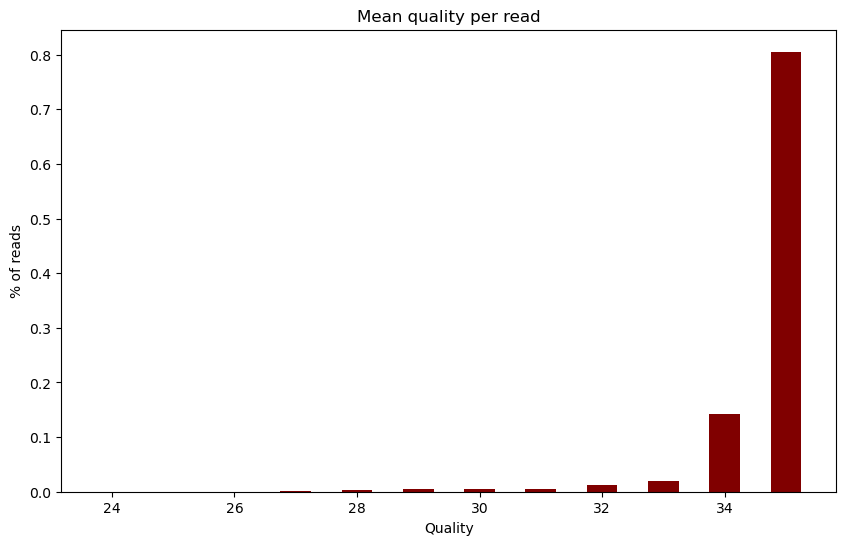

In [85]:
fig = plt.figure(figsize = (10,6))
plt.bar(unique_values, frequencies, color='maroon', width = 0.5)
plt.ylabel('% of reads')
plt.xlabel('Quality')
plt.title('Mean quality per read')
plt.show()

### 5) Determinare la distribuzione della qualità media per posizione lungo i reads

a) Ottenere la matrice delle qualità per posizione, in modo che l'i-esima riga contenga le qualità di tutte le i-esime basi dei reads.

In [86]:
qualities_per_pos = np.transpose(qualities_per_read)

In [87]:
qualities_per_pos

array([[31, 31, 31, ..., 31, 31, 31],
       [32, 31, 32, ..., 32, 32, 31],
       [30, 31, 32, ..., 32, 33, 31],
       ...,
       [12, 32, 32, ..., 31, 32, 32],
       [11, 32, 30, ..., 32, 32, 32],
       [31, 15, 31, ..., 31, 31, 31]])

b) Calcolare la qualità media per ogni posizione lungo i reads.

In [88]:
mean_quality_per_pos = [qualities.mean() for qualities in qualities_per_pos]

In [89]:
mean_quality_per_pos

[30.784,
 31.276,
 31.2662,
 31.247,
 33.2824,
 34.2708,
 34.1764,
 35.2354,
 35.2494,
 35.2044,
 35.282,
 35.209,
 35.2166,
 35.2914,
 35.21,
 35.2336,
 35.1926,
 35.2146,
 35.1502,
 35.1434,
 35.1908,
 35.1508,
 35.2192,
 35.1612,
 35.1708,
 35.1674,
 35.1906,
 35.1494,
 35.1144,
 35.1684,
 35.1366,
 35.149,
 35.1474,
 35.0964,
 35.1334,
 35.1572,
 35.136,
 35.0228,
 35.1296,
 35.1104,
 35.1246,
 35.1178,
 35.2034,
 35.124,
 35.1016,
 35.1554,
 35.1176,
 35.1002,
 35.1294,
 35.1246,
 35.1216,
 35.1214,
 35.0944,
 35.0526,
 35.131,
 35.1426,
 35.0496,
 35.1508,
 35.047,
 35.1268,
 35.1212,
 35.0268,
 35.1254,
 35.188,
 35.0576,
 35.0542,
 35.066,
 35.0974,
 35.105,
 35.0498,
 34.1564,
 33.1122,
 31.108,
 31.1824,
 31.2418,
 32.1554,
 30.7172,
 31.2314,
 30.2374,
 30.2046,
 32.1886,
 33.1558,
 34.0654,
 34.039,
 34.069,
 34.0488,
 34.0768,
 35.0372,
 35.0406,
 35.134,
 35.1066,
 35.0394,
 35.0234,
 35.0266,
 35.0548,
 35.0826,
 34.0924,
 35.0232,
 35.057,
 34.9142,
 34.9562,
 35.0982,


c) Disegnare il diagramma delle qualità medie per posizione.

<function matplotlib.pyplot.show(close=None, block=None)>

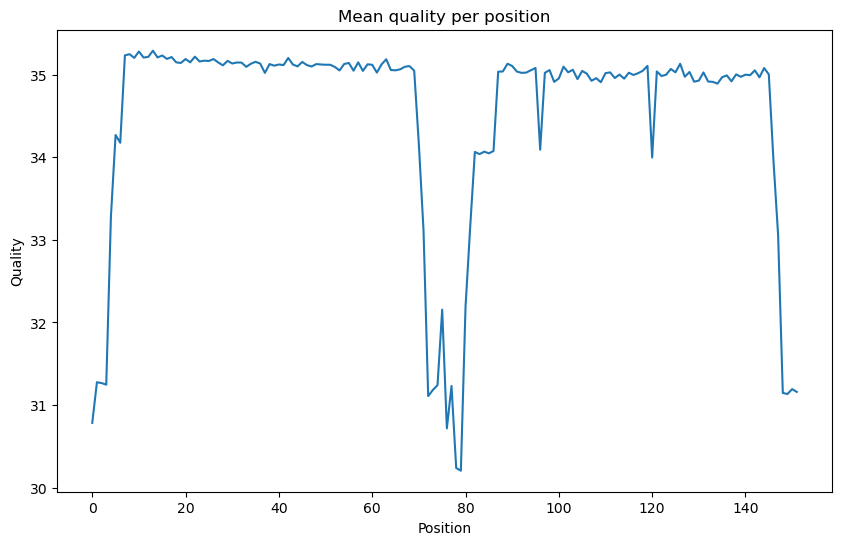

In [90]:
fig = plt.figure(figsize = (10,6))
plt.plot(mean_quality_per_pos)
plt.ylabel('Quality')
plt.xlabel('Position')
plt.title('Mean quality per position')
plt.show

d) Calcolare il novantesimo percentile per posizione

In [91]:
perc90_quality_per_pos = [np.percentile(qualities, 90) for qualities in qualities_per_pos]

In [93]:
perc90_quality_per_pos

[31.0,
 32.0,
 32.0,
 32.0,
 34.0,
 35.0,
 35.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 35.0,
 34.0,
 32.0,
 32.0,
 32.0,
 33.0,
 31.0,
 32.0,
 31.0,
 31.0,
 33.0,
 34.0,
 35.0,
 35.0,
 35.0,
 35.0,
 35.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 35.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 35.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,
 36.0,

c) Disegnare il diagramma del 90esimo percentile per posizione

<function matplotlib.pyplot.show(close=None, block=None)>

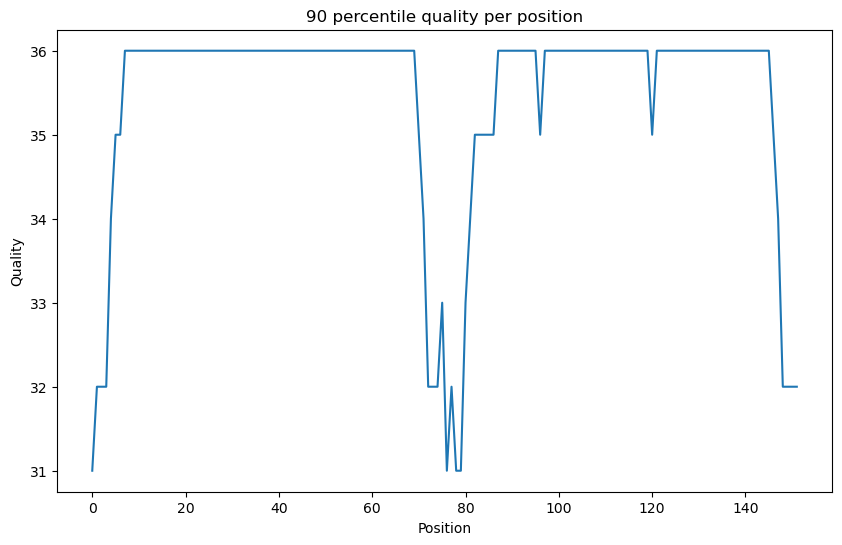

In [94]:
fig = plt.figure(figsize = (10,6))
plt.plot(perc90_quality_per_pos)
plt.ylabel('Quality')
plt.xlabel('Position')
plt.title('90 percentile quality per position')
plt.show

### 6) Determinare la distribuzione delle basi `A`, `C`, `G`, `T` per posizione

a) Creare la matrice delle basi dei reads, in modo che l'i-esima riga contenga le i-esime basi dei reads.

In [95]:
bases_per_pos = [list(read[1].rstrip()) for read in fastq_read_list]

In [96]:
bases_per_pos = np.transpose(np.array(bases_per_pos))

In [97]:
bases_per_pos

array([['T', 'C', 'G', ..., 'C', 'T', 'A'],
       ['T', 'C', 'G', ..., 'T', 'T', 'C'],
       ['A', 'C', 'G', ..., 'T', 'G', 'C'],
       ...,
       ['C', 'G', 'T', ..., 'A', 'G', 'G'],
       ['A', 'G', 'A', ..., 'G', 'G', 'G'],
       ['A', 'T', 'A', ..., 'A', 'A', 'A']], dtype='<U1')

b) Determinare, per ogni posizione lungo i reads, la distribuzione delle frequenze assolute delle basi.

In [98]:
count_list = [np.unique(bases, return_counts = True) for bases in bases_per_pos]

In [99]:
count_list

[(array(['A', 'C', 'G', 'T'], dtype='<U1'), array([1164, 1387, 1361, 1088])),
 (array(['A', 'C', 'G', 'N', 'T'], dtype='<U1'),
  array([1108, 1299, 1392,    3, 1198])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'), array([ 975, 1403, 1517, 1105])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'), array([ 988, 1370, 1472, 1170])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'), array([ 968, 1294, 1575, 1163])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'), array([ 984, 1392, 1467, 1157])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'), array([1087, 1315, 1484, 1114])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'), array([1092, 1277, 1514, 1117])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'), array([1000, 1385, 1539, 1076])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'), array([1077, 1340, 1420, 1163])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'), array([1068, 1380, 1441, 1111])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'), array([ 954, 1448, 1519, 1079])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'), array([

c) Determinare, per ogni posizione lungo i reads, la distribuzione delle frequenze relative delle basi.

In [100]:
frequency_list = [(count[0], count[1]/count[1].sum()) for count in count_list]

In [101]:
frequency_list

[(array(['A', 'C', 'G', 'T'], dtype='<U1'),
  array([0.2328, 0.2774, 0.2722, 0.2176])),
 (array(['A', 'C', 'G', 'N', 'T'], dtype='<U1'),
  array([0.2216, 0.2598, 0.2784, 0.0006, 0.2396])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'),
  array([0.195 , 0.2806, 0.3034, 0.221 ])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'),
  array([0.1976, 0.274 , 0.2944, 0.234 ])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'),
  array([0.1936, 0.2588, 0.315 , 0.2326])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'),
  array([0.1968, 0.2784, 0.2934, 0.2314])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'),
  array([0.2174, 0.263 , 0.2968, 0.2228])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'),
  array([0.2184, 0.2554, 0.3028, 0.2234])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'),
  array([0.2   , 0.277 , 0.3078, 0.2152])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'),
  array([0.2154, 0.268 , 0.284 , 0.2326])),
 (array(['A', 'C', 'G', 'T'], dtype='<U1'),
  array([0.2136, 0.276 , 0.2882, 0.2222])),
 (array(['A', 'C', 

f) Disegnare un diagramma a barre per ogni posizione lungo i reads.

### 7) Eseguire il *trimming* dei reads

a) Scegliere una soglia minima di qualità.

b) Definire una funzione che prenda come argomento una stringa di qualità (caratteri ASCII) e una soglia minima e restituisca il più lungo intervallo di posizioni contenente solo caratteri che codificano una qualità non al di sotto della soglia minima.

---
**SPIEGAZIONE**

In [44]:
quality_string = '@A?ACDBECEEECECEEECECEE>@@CEEECEC?EEC?CEE//EC0EE//:0E.//C-@=+D:0..C)D-?///:1@@@>ABCCDBCDDDECDDDDDCDDDDECDDDDECDDDDECD<D,DCDD+DEC,;D,6CD<,*.C,-:,BC,-@-,@'

In [45]:
min_quality = 20

Costruire una lista di valori booleani. L'i-esimo valore è `True` se l'i-esimo carattere codifica una qualità pari ad almeno la soglia minima. Le posizioni di inizio e fine della più lunga sottolista di soli valori `True` saranno le posizioni di inizio e fine sul read della porzione da tenere dopo il *trimming*.

In [47]:
bool_list

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,


Determinare la lista delle posizioni che contengono un valore `True` preceduto da un valore `False`. La posizione `0` è da intendere preceduta da un valore `False` di *default*.

In [49]:
start_list

[0,
 43,
 46,
 50,
 52,
 56,
 58,
 61,
 66,
 68,
 70,
 74,
 76,
 120,
 125,
 129,
 132,
 139,
 142,
 144,
 148,
 151]

Aggiungere una posizione di *default* pari a `1` all'inizio della lista.

In [51]:
start_list

[1,
 0,
 43,
 46,
 50,
 52,
 56,
 58,
 61,
 66,
 68,
 70,
 74,
 76,
 120,
 125,
 129,
 132,
 139,
 142,
 144,
 148,
 151]

Ottenere la lista delle posizioni che contengono un valore `True` seguito da un valore `False` (nella posizione seguente). L'ultima posizione è da intendere seguita da un valore `False` di *default*.

In [53]:
end_list

[40,
 44,
 47,
 50,
 52,
 56,
 59,
 62,
 66,
 68,
 70,
 74,
 118,
 123,
 127,
 130,
 135,
 139,
 142,
 145,
 148,
 151]

Aggiungere una posizione di *default* pari a `0` all'inizio della lista.

In [55]:
end_list

[0,
 40,
 44,
 47,
 50,
 52,
 56,
 59,
 62,
 66,
 68,
 70,
 74,
 118,
 123,
 127,
 130,
 135,
 139,
 142,
 145,
 148,
 151]

Ottenere le lunghezze degli intervalli di soli valori `True`.

In [57]:
interval_lengths

[0, 41, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 43, 4, 3, 2, 4, 1, 1, 2, 1, 1]

Determinare la posizione della massima lunghezza di un intervallo.

In [59]:
max_index

13

Determinare le posizioni di inizio `interval_start` e fine `interval_start` dell'intervallo di massima lunghezza.

In [61]:
interval_start

76

In [62]:
interval_end

118

La funzione deve restituire la lista `[interval_start, interval_end+1]` dei due indici da utilizzare in un'operazione di *slicing* del read in modo da tenere la porzione in cui tutte le basi hanno qualità almeno pari alla soglia minima predefinita.

**NB**: se viene restituita la lista `[1,1]` allora significa che tutti i valori in `bool_list` sono uguali a `False` (cioé tutte le qualità sono al di sotto della soglia minima), e il *trimming* restituirà la stringa vuota.

---

c) Definire una funzione che prenda come argomenti una soglia minima di qualità e un read in formato `FASTQ` (lista dei quattro *record* `FASTQ`) e restituisca il read in formato `FASTQ` dopo essere stato sottoposto a *trimming*.

d) Effettuare il *trimming* dei reads.

In [65]:
fastq_read_list

[['@SRR18961685.1 1 length=152',
  'CCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC',
  '+SRR18961685.1 1 length=152',
  '@@@>ABCCDBCDDDECDDDDDCDDDDECDDDDECDDDDECD<D'],
 ['@SRR18961685.2 2 length=152',
  'CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA',
  '+SRR18961685.2 2 length=152',
  '@@@AACCDDECDDDDECDDDDECDDDDECDDDDECDDDDECDDDDACDDDDECDDD9BCDDDD6CD'],
 ['@SRR18961685.3 3 length=152',
  'AGGGTTGGGGTTAGGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCT',
  '+SRR18961685.3 3 length=152',
  'CEEECEFEEECECEEEEC@CEEEE@ECEEECECEEE>ECEEECECEEE?ECEEECECEEDAA?AB@A>?ABCDBCCDDECDDDDEBDDDDACDDDDECDDDDECDDDDEBDDDDECDDDDEC=<DDE'],
 ['@SRR18961685.4 4 length=152',
  'GCGCAGAGAGGCGCACCGCGCCGGCGCAGGCGCAGAGACACATGCTAGCGCGTCCAGGGGTGGAGGCGTGGCGCAGGC',
  '+SRR18961685.4 4 length=152',
  '<B@>?@AC>DDD?EDDD@E@ED?EE@EDEEE@EDE<EDDDDDDFEEBEE@E@CED;EEEECFEDEEE@CFEE?C@AAA'],
 ['@SRR18961685.5 5 length=152',
  'GCGCAGAGAGGCGCACCGCG

e) Eliminare i reads troppo corti.

In [68]:
fastq_read_list

[['@SRR18961685.1 1 length=152',
  'CCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC',
  '+SRR18961685.1 1 length=152',
  '@@@>ABCCDBCDDDECDDDDDCDDDDECDDDDECDDDDECD<D'],
 ['@SRR18961685.2 2 length=152',
  'CCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA',
  '+SRR18961685.2 2 length=152',
  '@@@AACCDDECDDDDECDDDDECDDDDECDDDDECDDDDECDDDDACDDDDECDDD9BCDDDD6CD'],
 ['@SRR18961685.3 3 length=152',
  'AGGGTTGGGGTTAGGGGTTAGGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCT',
  '+SRR18961685.3 3 length=152',
  'CEEECEFEEECECEEEEC@CEEEE@ECEEECECEEE>ECEEECECEEE?ECEEECECEEDAA?AB@A>?ABCDBCCDDECDDDDEBDDDDACDDDDECDDDDECDDDDEBDDDDECDDDDEC=<DDE'],
 ['@SRR18961685.4 4 length=152',
  'GCGCAGAGAGGCGCACCGCGCCGGCGCAGGCGCAGAGACACATGCTAGCGCGTCCAGGGGTGGAGGCGTGGCGCAGGC',
  '+SRR18961685.4 4 length=152',
  '<B@>?@AC>DDD?EDDD@E@ED?EE@EDEEE@EDE<EDDDDDDFEEBEE@E@CED;EEEECFEDEEE@CFEE?C@AAA'],
 ['@SRR18961685.5 5 length=152',
  'GCGCAGAGAGGCGCACCGCG

### 8) Determinare la distribuzione delle qualità medie dei reads dopo il *trimming*

a) Creare la lista dei valori di qualità dei reads. L'i-esimo elemento è la lista contenente le qualità delle basi dell'i-esimo read.

In [70]:
qualities_per_read

[[31,
  31,
  31,
  29,
  32,
  33,
  34,
  34,
  35,
  33,
  34,
  35,
  35,
  35,
  36,
  34,
  35,
  35,
  35,
  35,
  35,
  34,
  35,
  35,
  35,
  35,
  36,
  34,
  35,
  35,
  35,
  35,
  36,
  34,
  35,
  35,
  35,
  35,
  36,
  34,
  35,
  27,
  35],
 [31,
  31,
  31,
  32,
  32,
  34,
  34,
  35,
  35,
  36,
  34,
  35,
  35,
  35,
  35,
  36,
  34,
  35,
  35,
  35,
  35,
  36,
  34,
  35,
  35,
  35,
  35,
  36,
  34,
  35,
  35,
  35,
  35,
  36,
  34,
  35,
  35,
  35,
  35,
  36,
  34,
  35,
  35,
  35,
  35,
  32,
  34,
  35,
  35,
  35,
  35,
  36,
  34,
  35,
  35,
  35,
  24,
  33,
  34,
  35,
  35,
  35,
  35,
  21,
  34,
  35],
 [34,
  36,
  36,
  36,
  34,
  36,
  37,
  36,
  36,
  36,
  34,
  36,
  34,
  36,
  36,
  36,
  36,
  34,
  31,
  34,
  36,
  36,
  36,
  36,
  31,
  36,
  34,
  36,
  36,
  36,
  34,
  36,
  34,
  36,
  36,
  36,
  29,
  36,
  34,
  36,
  36,
  36,
  34,
  36,
  34,
  36,
  36,
  36,
  30,
  36,
  34,
  36,
  36,
  36,
  34,
  36,
  34,
  

b) Determinare la lista delle qualità medie dei reads.

In [72]:
mean_quality_per_read

[34.13953488372093,
 34.196969696969695,
 34.55118110236221,
 33.92307692307692,
 34.17948717948718,
 33.9390243902439,
 35.072,
 34.60576923076923,
 34.130434782608695,
 34.72641509433962,
 34.82236842105263,
 34.73076923076923,
 34.354166666666664,
 34.86184210526316,
 34.73626373626374,
 35.00675675675676,
 34.93421052631579,
 34.65822784810127,
 34.747747747747745,
 34.86842105263158,
 35.0328947368421,
 35.05921052631579,
 34.51428571428571,
 34.776315789473685,
 34.94078947368421,
 34.58510638297872,
 34.3013698630137,
 34.81395348837209,
 34.921052631578945,
 34.94736842105263,
 34.935064935064936,
 34.56470588235294,
 34.86184210526316,
 34.98684210526316,
 35.0,
 34.8421052631579,
 35.00657894736842,
 34.828947368421055,
 34.89473684210526,
 34.81578947368421,
 34.69736842105263,
 34.953947368421055,
 34.901315789473685,
 34.94078947368421,
 35.03947368421053,
 34.66447368421053,
 34.83552631578947,
 34.89423076923077,
 34.86184210526316,
 34.93421052631579,
 35.01315789473684

c) Arrotondare le qualità medie all'intero più vicino.

In [74]:
mean_quality_per_read

[34,
 34,
 35,
 34,
 34,
 34,
 35,
 35,
 34,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 33,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 34,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 33,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 34,


d) Determinare la distribuzione delle frequenze assolute delle qualità medie dei reads.

In [76]:
unique_values

array([32, 33, 34, 35])

In [77]:
counts

array([   2,   27,  426, 4459])

e) Determinare la distribuzione delle frequenze relative delle qualità medie dei reads. 

In [79]:
frequencies

array([4.07000407e-04, 5.49450549e-03, 8.66910867e-02, 9.07407407e-01])

f) Disegnare un diagramma a barre